In [5]:
import numpy as np
import matplotlib.pyplot as plt

$$
-\nabla k(\nabla T) = 0
$$
Isto é
$$
-k \cdot \left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\right) = 0
$$

In [16]:
def f(x,y):
    return 0

def kappa_1(x,y):
    return 410

def g(x,y):
    if x < 0.05:
        return 410
    else:
        return 0.1
    
def solver_heat(f, Nx, Ny, b_values, k):
        A = []
        b = np.zeros(Nx*Ny)
        hx = 1/(Nx+1)
        hy = 1/(Ny-1)
        xs = [i*hx for i in range(1,Nx+1)]
        ys = [(j-1)*hy for j in range(1,Ny+1)]

        for n in range(Nx*Ny):
            j = n//Nx + 1
            i = n - Nx*(j-1)+1

            xi = xs[i-1]
            yj = ys[j-1]
            xi_half_b = xi-hx/2 ## x_{i-1/2}, backward half step
            xi_half_f = xi+hx/2 ## x_{i+1/2}, forward half step
            yj_half_b = yj-hy/2 ## y_{j-1/2}, backward half step
            yj_half_f = yj+hy/2 ## y_{j+1/2}, forward half step

            a = np.zeros(Nx*Ny)
            a[n] = -(k(xi_half_f, yj) + k(xi_half_b, yj))/hx**2 - (k(xi, yj_half_f) + k(xi, yj_half_b))/hy**2 
            if i == 1:
                b[n] -= k(xi_half_b, yj)*b_values[0]/hx**2
            else:
                a[n-1] = k(xi_half_b, yj)/hx**2
            if i == Nx:
                b[n] -= k(xi_half_f, yj)*b_values[1]/hx**2
            else:
                a[n+1] = k(xi_half_f, yj)/hx**2
            if j == 1:
                a[n] += k(xi, yj_half_b)/hy**2
            else:
                a[n-Nx] = k(xi, yj_half_b)/hy**2
            if j == Ny:
                a[n] += k(xi, yj_half_f)/hy**2
            else:
                a[n+Nx] = k(xi, yj_half_f)/hy**2
            A.append(a)
        ys = np.linalg.solve(A,b)
        M = []
        
        for i in range(0, Nx*Ny, Nx):
            y = ys[i:i+Nx]
            M.append(y)
        return np.array(M)

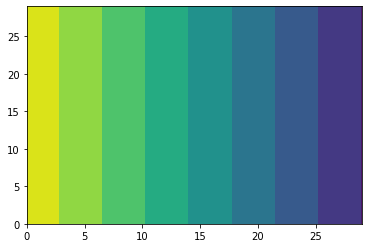

In [18]:
ys = solver_heat(f, 30, 30, [500,293], kappa_1)
plt.contourf(ys)